# General Chess Trends
TWIC - This week in chess is a magazine which publishes most of the best games by top players every week. This dataset from kaggle contains all the games in Twic from 2012 till the middle of 2022.

In this notebook we will explore the differents trends in chess games for the years 2012-2022
1. Number of games Played over the year(Online and offline)
2. Dependency of Results on rating

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chess

pd.set_option('display.max_columns', 500)
df = pd.read_csv('./archive/twic_master.csv')

plt.style.use('ggplot')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16168\2054691096.py:7: DtypeWarning: Columns (10,13,14,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./archive/twic_master.csv')


In [124]:
df.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476.0,1503014.0,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192.0,4611500.0,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045.0,24101605.0,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737.0,4115341.0,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507.0,13300474.0,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.Number of Games

In [125]:
# The dates in the csv are in string format and have to be converted Date and time format
df['Date'] = pd.to_datetime(df['EventDate'], errors='coerce')
df['Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df['Year'] = df['Date'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_16168\4129613746.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [126]:
df = df.query('2022 > Year > 2012')

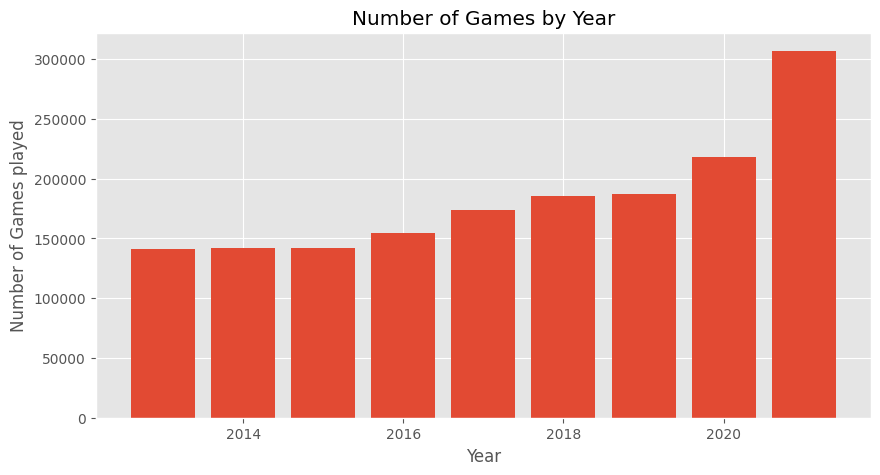

In [127]:
# Sorting
games_by_year = df['Year'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.bar(games_by_year.index, games_by_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Games played")  # Use the assigned name for the y-axis
plt.title("Number of Games by Year")
plt.show()

#### 1.1 Number of games online vs Number of games offline

In [128]:
games_online = df[df['Online'] == True]
games_offline = df[df['Online'] == False]
games_online_by_year = games_online['Year'].value_counts().sort_index()
games_offline_by_year = games_offline['Year'].value_counts().sort_index()

game_count = pd.DataFrame({
    'Games Online': games_online_by_year,
    'Games Offline': games_offline_by_year
})

# Reset the index and rename it to 'Year'
game_count.index.name = 'Year'

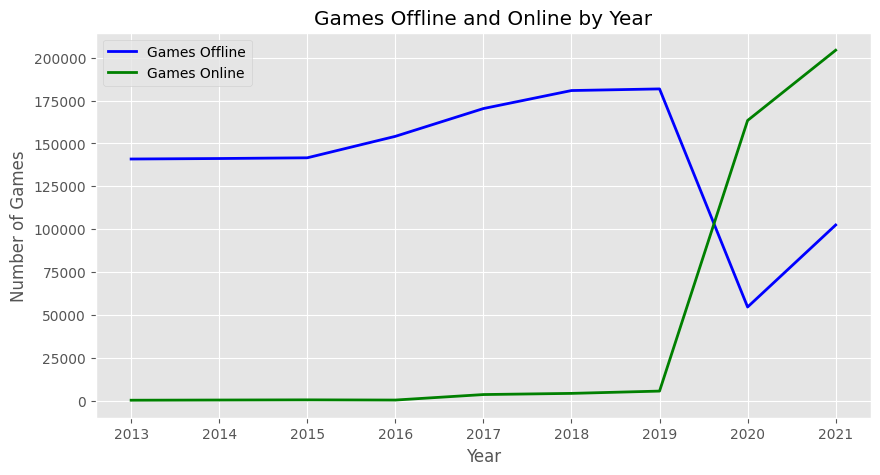

In [129]:
plt.figure(figsize=(10, 5))
plt.plot(game_count.index, game_count['Games Offline'], label='Games Offline', color='blue', linestyle='-', linewidth=2)
plt.plot(game_count.index, game_count['Games Online'], label='Games Online', color='green', linestyle='-', linewidth=2)

# Set plot labels and title
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Games Offline and Online by Year")

# Display a legend to identify the lines
plt.legend()

# Show the plot
plt.show()

I think we can infer the following from the above visual
1. There has been a significant drop in the number of chess games played offline in 2019-2020 because of Covid
2. There is a significant boom in online chess during the same period
3. We can also see that the offline chess is picking back up in 2021
4. Another interesting thing I noticed is that the online chess shows no sign of going back down!
5. Yet another interesting discovery is the fact that online chess already picked up a tiny bit in 2016 and has a very slow yet steady increase till the corona boom

### 2 Dependency of Result

#### 2.1 Result vs Colors

In [130]:
no_of_games_online = games_online.shape[0]
no_of_games_offline = games_offline.shape[0]
total_games = no_of_games_offline + no_of_games_online
# For total number games
white_wins = df[df['Result'] == "1-0"].shape[0]
black_wins = df[df['Result'] == "0-1"].shape[0]
draws = df[df['Result'] == "1/2-1/2"].shape[0]

white_wins_percent = (white_wins / total_games) * 100
black_wins_percent = (black_wins / total_games) * 100
draws_percent = (draws / total_games) * 100

# For online games
white_wins_online = games_online[games_online['Result'] == "1-0"].shape[0]
black_wins_online = games_online[games_online['Result'] == "0-1"].shape[0]
draws_online = games_online[games_online['Result'] == "1/2-1/2"].shape[0]

white_wins_percent_online = (white_wins_online / no_of_games_online) * 100
black_wins_percent_online = (black_wins_online / no_of_games_online) * 100
draws_percent_online = (draws_online / no_of_games_online) * 100

# For Offline games
white_wins_offline = games_offline[games_offline['Result'] == "1-0"].shape[0]
black_wins_offline = games_offline[games_offline['Result'] == "0-1"].shape[0]
draws_offline = games_offline[games_offline['Result'] == "1/2-1/2"].shape[0]

white_wins_percent_offline = (white_wins_offline / no_of_games_offline) * 100
black_wins_percent_offline = (black_wins_offline / no_of_games_offline) * 100
draws_percent_offline = (draws_offline / no_of_games_offline) * 100

wins_by_color = pd.DataFrame({
    'Color': ['White wins', 'Black wins', 'Draw'],
    'Result Percentage': [white_wins_percent, black_wins_percent, draws_percent]  # Counts of wins by White and Black
})

wins_by_color_online = pd.DataFrame({
    'Color': ['White wins', 'Black wins', 'Draw'],
    'Result Percentage': [white_wins_percent_online, black_wins_percent_online, draws_percent_online]  # Counts of wins by White and Black
})

wins_by_color_offline = pd.DataFrame({
    'Color': ['White wins', 'Black wins', 'Draw'],
    'Result Percentage': [white_wins_percent_offline, black_wins_percent_offline, draws_percent_offline]  # Counts of wins by White and Black
})

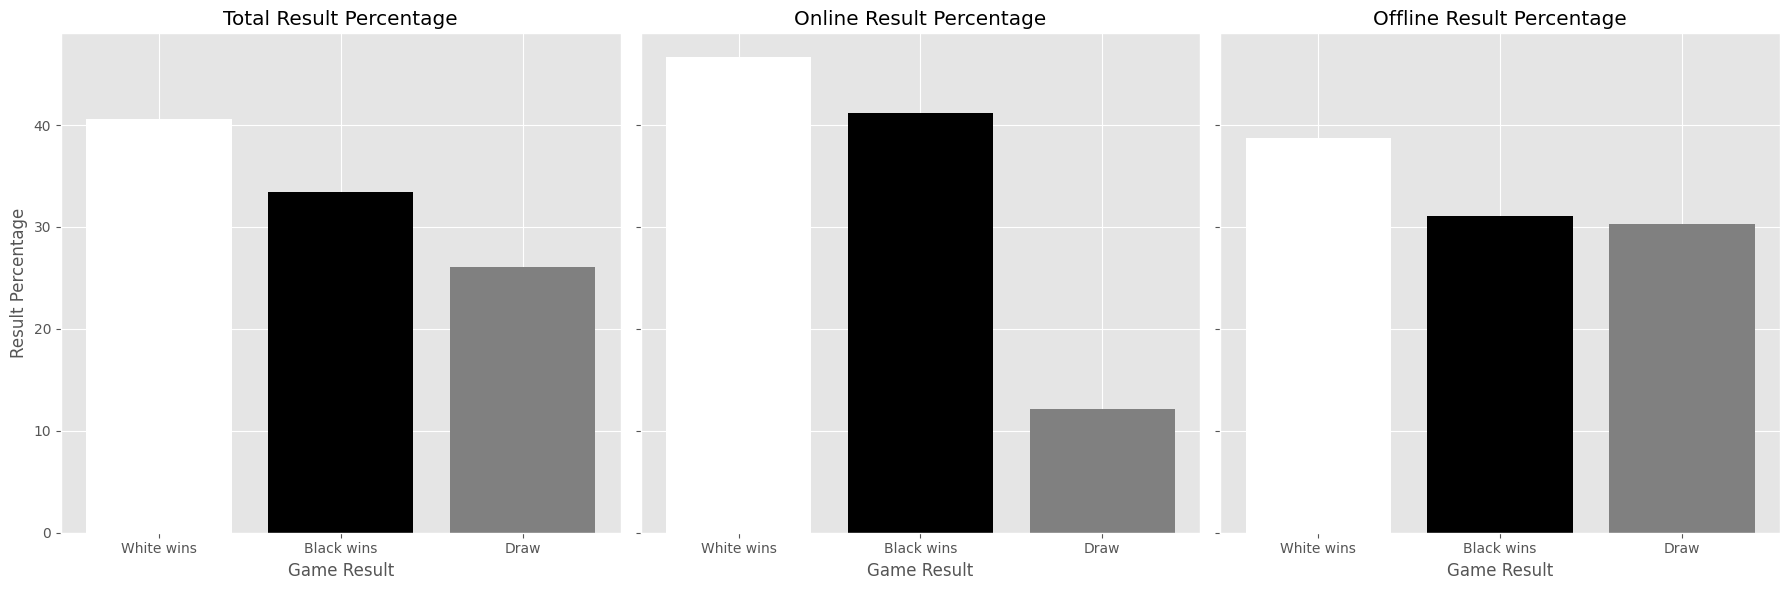

In [131]:


fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 plots with a shared y-axis

# Plot the first DataFrame
ax[0].bar(wins_by_color['Color'], wins_by_color['Result Percentage'], color=['white', 'black', 'gray'])
ax[0].set_title("Total Result Percentage")
ax[0].set_xlabel("Game Result")
ax[0].set_ylabel("Result Percentage")

# Plot the second DataFrame
ax[1].bar(wins_by_color_online['Color'], wins_by_color_online['Result Percentage'], color=['white', 'black', 'gray'])
ax[1].set_title("Online Result Percentage")
ax[1].set_xlabel("Game Result")

# Plot the third DataFrame
ax[2].bar(wins_by_color_offline['Color'], wins_by_color_offline['Result Percentage'], color=['white', 'black', 'gray'])
ax[2].set_title("Offline Result Percentage")
ax[2].set_xlabel("Game Result")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

From the above visual
1. We can see that a player has more chance to win with white compared to black
2. There is a significantly less chance for a draw in online games
3. The possibility of draw is almost equal to the possibility of black winning a game!

#### 2.2 Result vs ELO

In [132]:
df['higher_elo_white'] = df['WhiteElo'] > df['BlackElo']
df['higher_elo_black'] = df['WhiteElo'] < df['BlackElo']
wins_higher_elo = df.query(
    "(higher_elo_white and Result == '1-0') or (higher_elo_black and Result == '0-1')"
)
wins_lower_elo = df.query(
    "(higher_elo_white and Result == '0-1') or (higher_elo_black and Result == '1-0')"
)

no_of_wins_higher_elo = wins_higher_elo.shape[0]
higher_elo_win_percent = (no_of_wins_higher_elo / total_games) * 100
no_of_wins_lower_elo = wins_lower_elo.shape[0]
lower_elo_win_percent = (no_of_wins_lower_elo / total_games) * 100

wins_by_elo = pd.DataFrame({
    'Category': ['Wins with Higher Elo', 'Wins with Lower Elo'],
    'Win Percentage': [higher_elo_win_percent, lower_elo_win_percent]
})

# Online

games_online['higher_elo_white'] = games_online['WhiteElo'] > games_online['BlackElo']
games_online['higher_elo_black'] = games_online['WhiteElo'] < games_online['BlackElo']
wins_higher_elo_online = games_online.query(
    "(higher_elo_white and Result == '1-0') or (higher_elo_black and Result == '0-1')"
)
wins_lower_elo_online = games_online.query(
    "(higher_elo_white and Result == '0-1') or (higher_elo_black and Result == '1-0')"
)

no_of_wins_higher_elo_online = wins_higher_elo_online.shape[0]
higher_elo_win_percent_online = (no_of_wins_higher_elo_online / no_of_games_online) * 100
no_of_wins_lower_elo_online = wins_lower_elo_online.shape[0]
lower_elo_win_percent_online = (no_of_wins_lower_elo_online / no_of_games_online) * 100

wins_by_elo_online = pd.DataFrame({
    'Category': ['Wins with Higher Elo', 'Wins with Lower Elo'],
    'Win Percentage': [higher_elo_win_percent_online, lower_elo_win_percent_online]
})

# offline

games_offline['higher_elo_white'] = games_offline['WhiteElo'] > games_offline['BlackElo']
games_offline['higher_elo_black'] = games_offline['WhiteElo'] < games_offline['BlackElo']
wins_higher_elo_offline = games_offline.query(
    "(higher_elo_white and Result == '1-0') or (higher_elo_black and Result == '0-1')"
)
wins_lower_elo_offline = games_offline.query(
    "(higher_elo_white and Result == '0-1') or (higher_elo_black and Result == '1-0')"
)

no_of_wins_higher_elo_offline = wins_higher_elo_offline.shape[0]
higher_elo_win_percent_offline = (no_of_wins_higher_elo_offline / no_of_games_offline) * 100
no_of_wins_lower_elo_offline = wins_lower_elo_offline.shape[0]
lower_elo_win_percent_offline = (no_of_wins_lower_elo_offline / no_of_games_offline) * 100

wins_by_elo_offline = pd.DataFrame({
    'Category': ['Wins with Higher Elo', 'Wins with Lower Elo'],
    'Win Percentage': [higher_elo_win_percent_offline, lower_elo_win_percent_offline]
})

C:\Users\Admin\AppData\Local\Temp\ipykernel_16168\278064345.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_online['higher_elo_white'] = games_online['WhiteElo'] > games_online['BlackElo']
C:\Users\Admin\AppData\Local\Temp\ipykernel_16168\278064345.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_online['higher_elo_black'] = games_online['WhiteElo'] < games_online['BlackElo']
C:\Users\Admin\AppData\Local\Temp\ipykernel_16168\278064345.py:43: SettingWithCopyWarning: 
A value is trying to

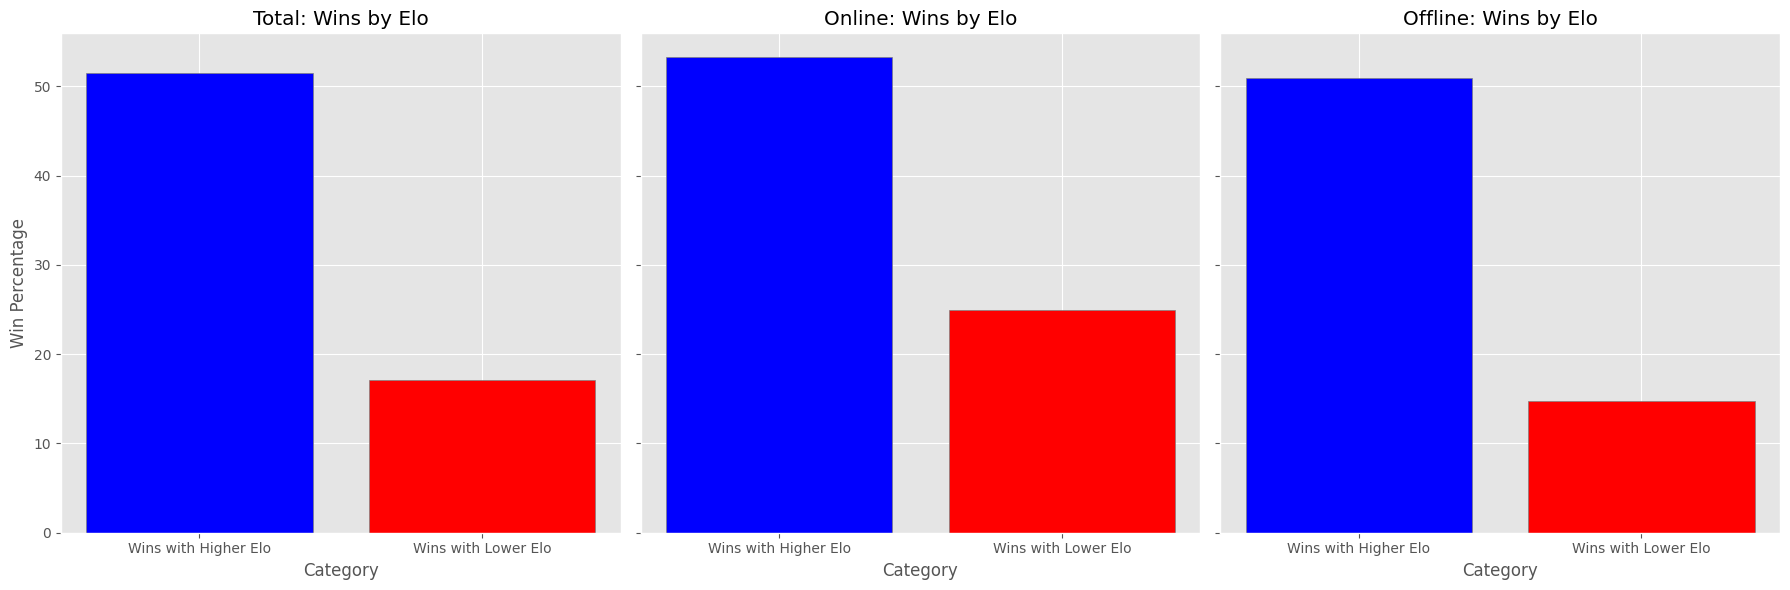

In [133]:
# Create a subplot with 3 bar charts
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns, same y-axis

# Plot for total games (higher and lower Elo)
ax[0].bar(wins_by_elo['Category'], wins_by_elo['Win Percentage'], color=['blue', 'red'], edgecolor='gray')
ax[0].set_title("Total: Wins by Elo")
ax[0].set_xlabel("Category")
ax[0].set_ylabel("Win Percentage")

# Plot for online games
ax[1].bar(wins_by_elo_online['Category'], wins_by_elo_online['Win Percentage'], color=['blue', 'red'], edgecolor='gray')
ax[1].set_title("Online: Wins by Elo")
ax[1].set_xlabel("Category")

# Plot for offline games
ax[2].bar(wins_by_elo_offline['Category'], wins_by_elo_offline['Win Percentage'], color=['blue', 'red'], edgecolor='gray')
ax[2].set_title("Offline: Wins by Elo")
ax[2].set_xlabel("Category")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

1. As expected the higher ELO player almost always wins
2. The interesting part is that the player with a lower elo has around 10 percent increase in chance to win in an online format



## Conclusion
    Online Games seem to be more dynamic in nature with less chances of draw, and more chances for players to win with Black!

# Author

_Eshwanth Dev Kumar_